<a href="https://colab.research.google.com/github/Trishund/healthcare-dataset-prediction-model/blob/main/python/falcipain_2_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df = pd.read_csv('/content/Falciapin_2_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [3]:
X = df.drop('pIC50', axis=1)
X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
428,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
429,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,1,0,0,0,0,1
430,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1


### **3.2. Output features**

In [4]:
Y = df.pIC50
Y

,pIC50
0,4.357535
1,5.356547
2,4.460924
3,4.505845
4,4.879426
...,...
427,5.148742
428,4.982967
429,5.267606
430,5.337242


### **3.3. Let's examine the data dimension**

In [5]:
X.shape

(432, 307)

In [6]:
Y.shape

(432,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [8]:
X.shape

(432, 16)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((345, 16), (345,))

In [11]:
X_test.shape, Y_test.shape

((87, 16), (87,))

## **5. Building a Regression Model using Random Forest**

In [12]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4727193151108139

In [13]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

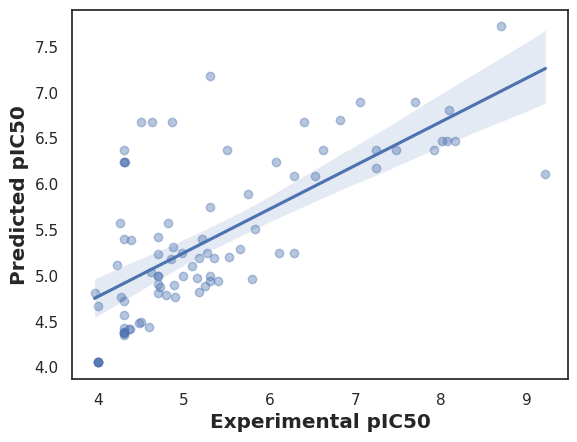

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')

plt.show()
